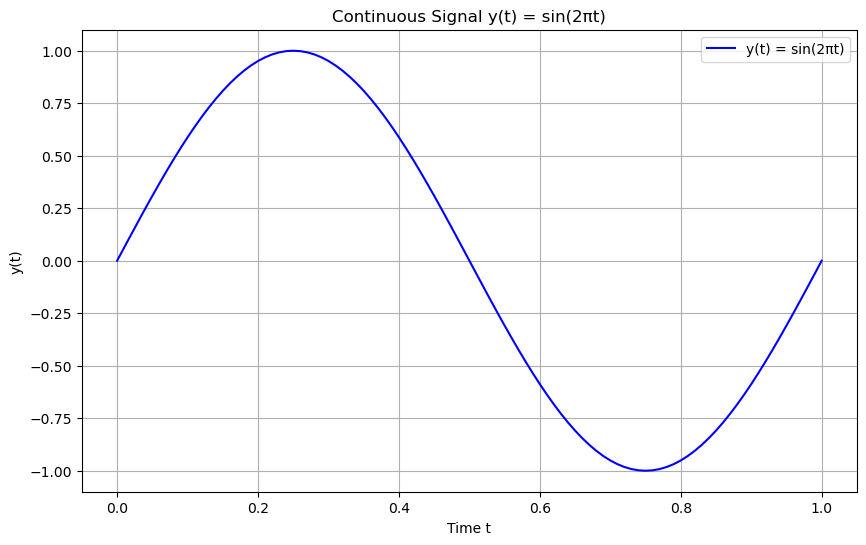

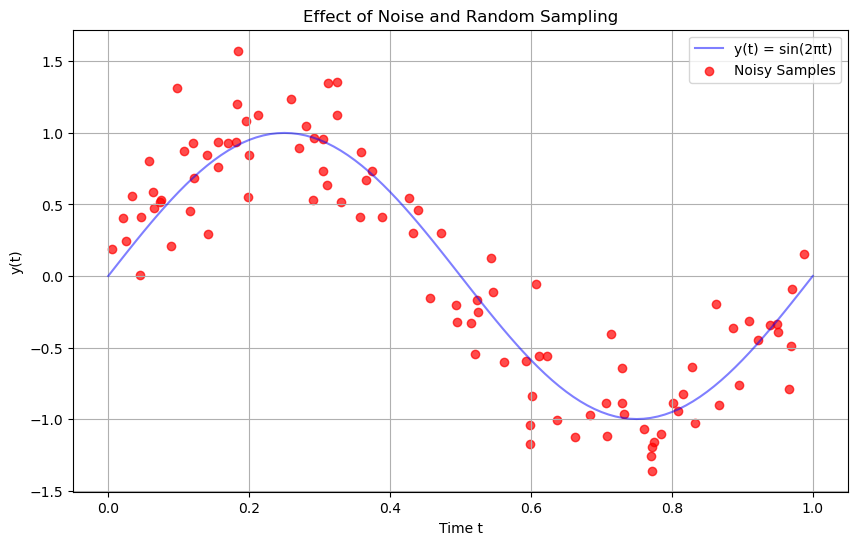

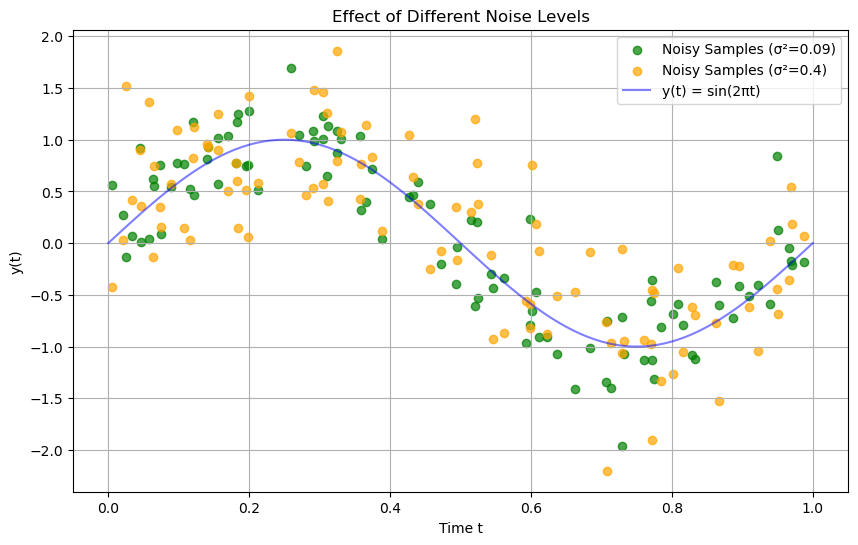

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Task 1: Continuous signal
# Define time interval
tk = np.arange(0, 1.01, 0.01)

# Compute yk without noise
yk = np.sin(2 * np.pi * tk)

# Plot the continuous signal
plt.figure(figsize=(10, 6))
plt.plot(tk, yk, label="y(t) = sin(2πt)", color='blue')
plt.title("Continuous Signal y(t) = sin(2πt)")
plt.xlabel("Time t")
plt.ylabel("y(t)")
plt.grid()
plt.legend()
plt.show()

# Task 2: Random sampling and noise
np.random.seed(42)  # For reproducibility

# Generate tk uniformly between 0 and 1
tk_uniform = np.random.uniform(0, 1, 100)

# Add Gaussian noise with variance sigma^2 = 0.09
sigma_squared = 0.09
noise = np.random.normal(0, np.sqrt(sigma_squared), len(tk_uniform))

yk_noisy = np.sin(2 * np.pi * tk_uniform) + noise

# Plot the random samples with noise
plt.figure(figsize=(10, 6))
plt.plot(tk, yk, label="y(t) = sin(2πt)", color='blue', alpha=0.5)
plt.scatter(tk_uniform, yk_noisy, color='red', label="Noisy Samples", alpha=0.7)
plt.title("Effect of Noise and Random Sampling")
plt.xlabel("Time t")
plt.ylabel("y(t)")
plt.grid()
plt.legend()
plt.show()

# Task 3: Varying noise levels
sigma_squared_1 = 0.09
sigma_squared_2 = 0.4

# Add noise for both cases
noise_1 = np.random.normal(0, np.sqrt(sigma_squared_1), len(tk_uniform))
noise_2 = np.random.normal(0, np.sqrt(sigma_squared_2), len(tk_uniform))

yk_noisy_1 = np.sin(2 * np.pi * tk_uniform) + noise_1
yk_noisy_2 = np.sin(2 * np.pi * tk_uniform) + noise_2

# Plot the comparison
plt.figure(figsize=(10, 6))
plt.scatter(tk_uniform, yk_noisy_1, color='green', label=f"Noisy Samples (σ²={sigma_squared_1})", alpha=0.7)
plt.scatter(tk_uniform, yk_noisy_2, color='orange', label=f"Noisy Samples (σ²={sigma_squared_2})", alpha=0.7)
plt.plot(tk, yk, label="y(t) = sin(2πt)", color='blue', alpha=0.5)
plt.title("Effect of Different Noise Levels")
plt.xlabel("Time t")
plt.ylabel("y(t)")
plt.grid()
plt.legend()
plt.show()


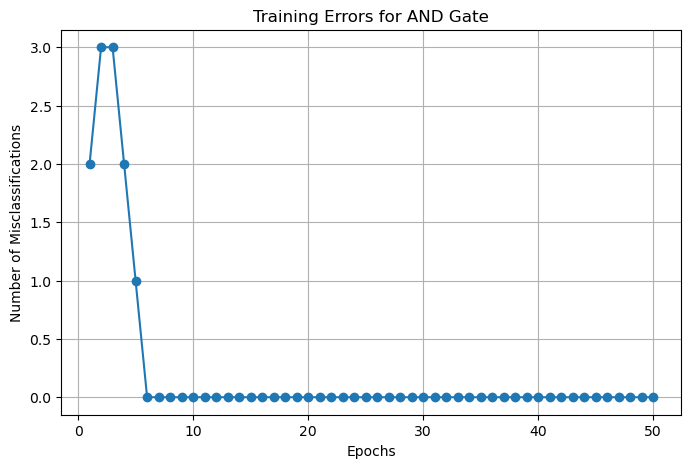

AND Gate
Weights: [0.02 0.01], Bias: -0.03
Predictions: [0 0 0 1]



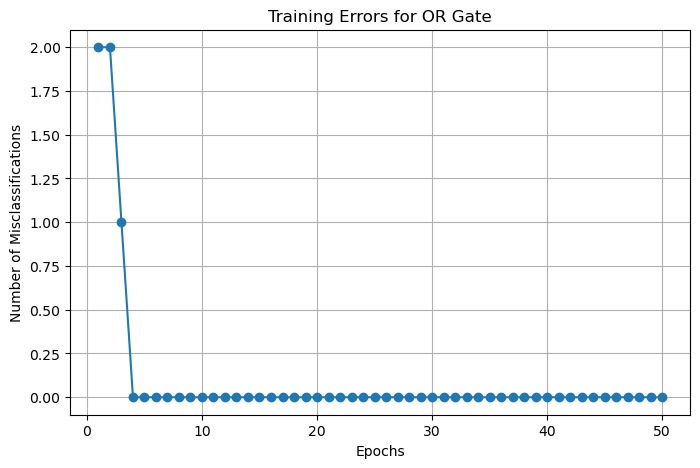

OR Gate
Weights: [0.01 0.01], Bias: -0.01
Predictions: [0 1 1 1]



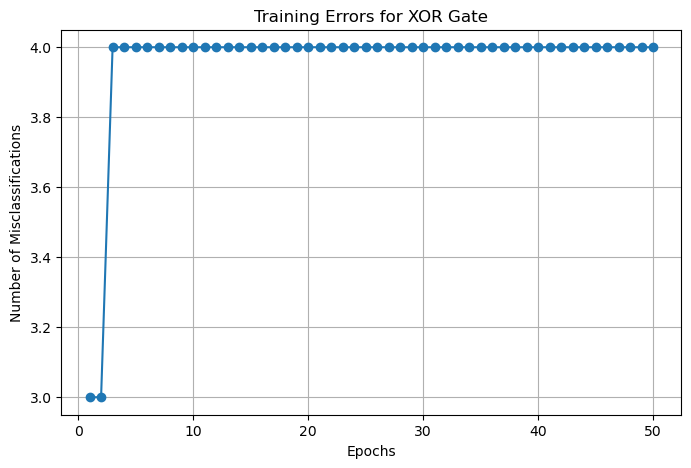

XOR Gate
Weights: [-0.01  0.  ], Bias: 0.0
Predictions: [1 1 0 0]



In [5]:
# Exercise 2: Rosenblatt Perceptron
# Define truth tables for AND, OR, XOR gates
truth_tables = {
    "AND": np.array([[0, 0, 0], [0, 1, 0], [1, 0, 0], [1, 1, 1]]),
    "OR": np.array([[0, 0, 0], [0, 1, 1], [1, 0, 1], [1, 1, 1]]),
    "XOR": np.array([[0, 0, 0], [0, 1, 1], [1, 0, 1], [1, 1, 0]])
}

# Perceptron function
def perceptron_train(X, y, eta, epochs):
    weights = np.zeros(X.shape[1])
    bias = 0
    errors = []

    for epoch in range(epochs):
        total_error = 0
        for i in range(len(y)):
            update = eta * (y[i] - predict(X[i], weights, bias))
            weights += update * X[i]
            bias += update
            total_error += int(update != 0.0)
        errors.append(total_error)

    return weights, bias, errors

def predict(x, weights, bias):
    return 1 if np.dot(x, weights) + bias >= 0 else 0

# Training and evaluation for each gate
eta = 1e-2
epochs = 50

for gate, table in truth_tables.items():
    # Prepare training data
    X = table[:, :2]
    y = table[:, 2]

    # Train perceptron
    weights, bias, errors = perceptron_train(X, y, eta, epochs)

    # Plot errors over epochs
    plt.figure(figsize=(8, 5))
    plt.plot(range(1, epochs + 1), errors, marker='o')
    plt.title(f"Training Errors for {gate} Gate")
    plt.xlabel("Epochs")
    plt.ylabel("Number of Misclassifications")
    plt.grid()
    plt.show()

    # Test perceptron
    predictions = np.array([predict(x, weights, bias) for x in X])
    print(f"{gate} Gate\nWeights: {weights}, Bias: {bias}\nPredictions: {predictions}\n")